# ТЕМПЕРАТУРНА ЗАЛЕЖНІСТЬ ЕЛЕКТРОПРОВІДНОСТІ МЕТАЛІВ

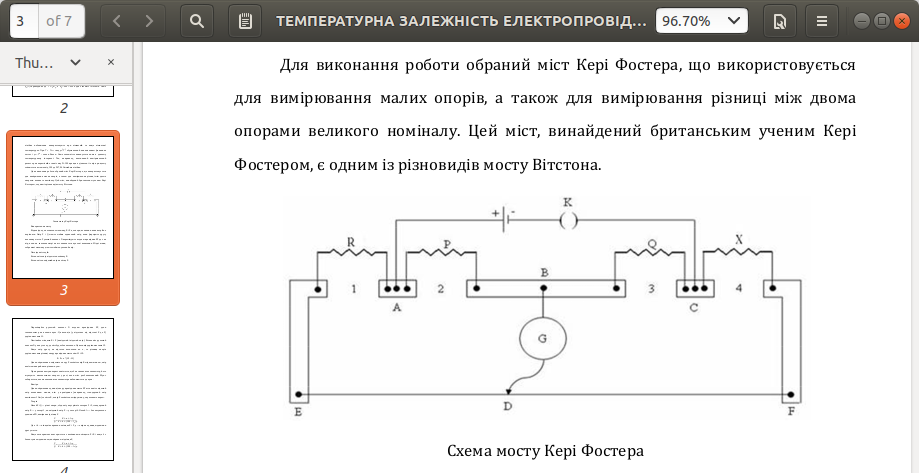

Використання мосту


Відповідно до позначень малюнку, R і X це опори, величини яких потрібно
порівняти. Опір P і Q мають майже однаковий опір, вони формують другу
половину моста. Рухомий контакт D переміщують вздовж провідник EF до тих
пір, поки на гальванометрі не встановляться нульові показання.


Послідовність дій:
Встановіть опір відомого номіналу R.
Встановіть невідомий опір на місце X.

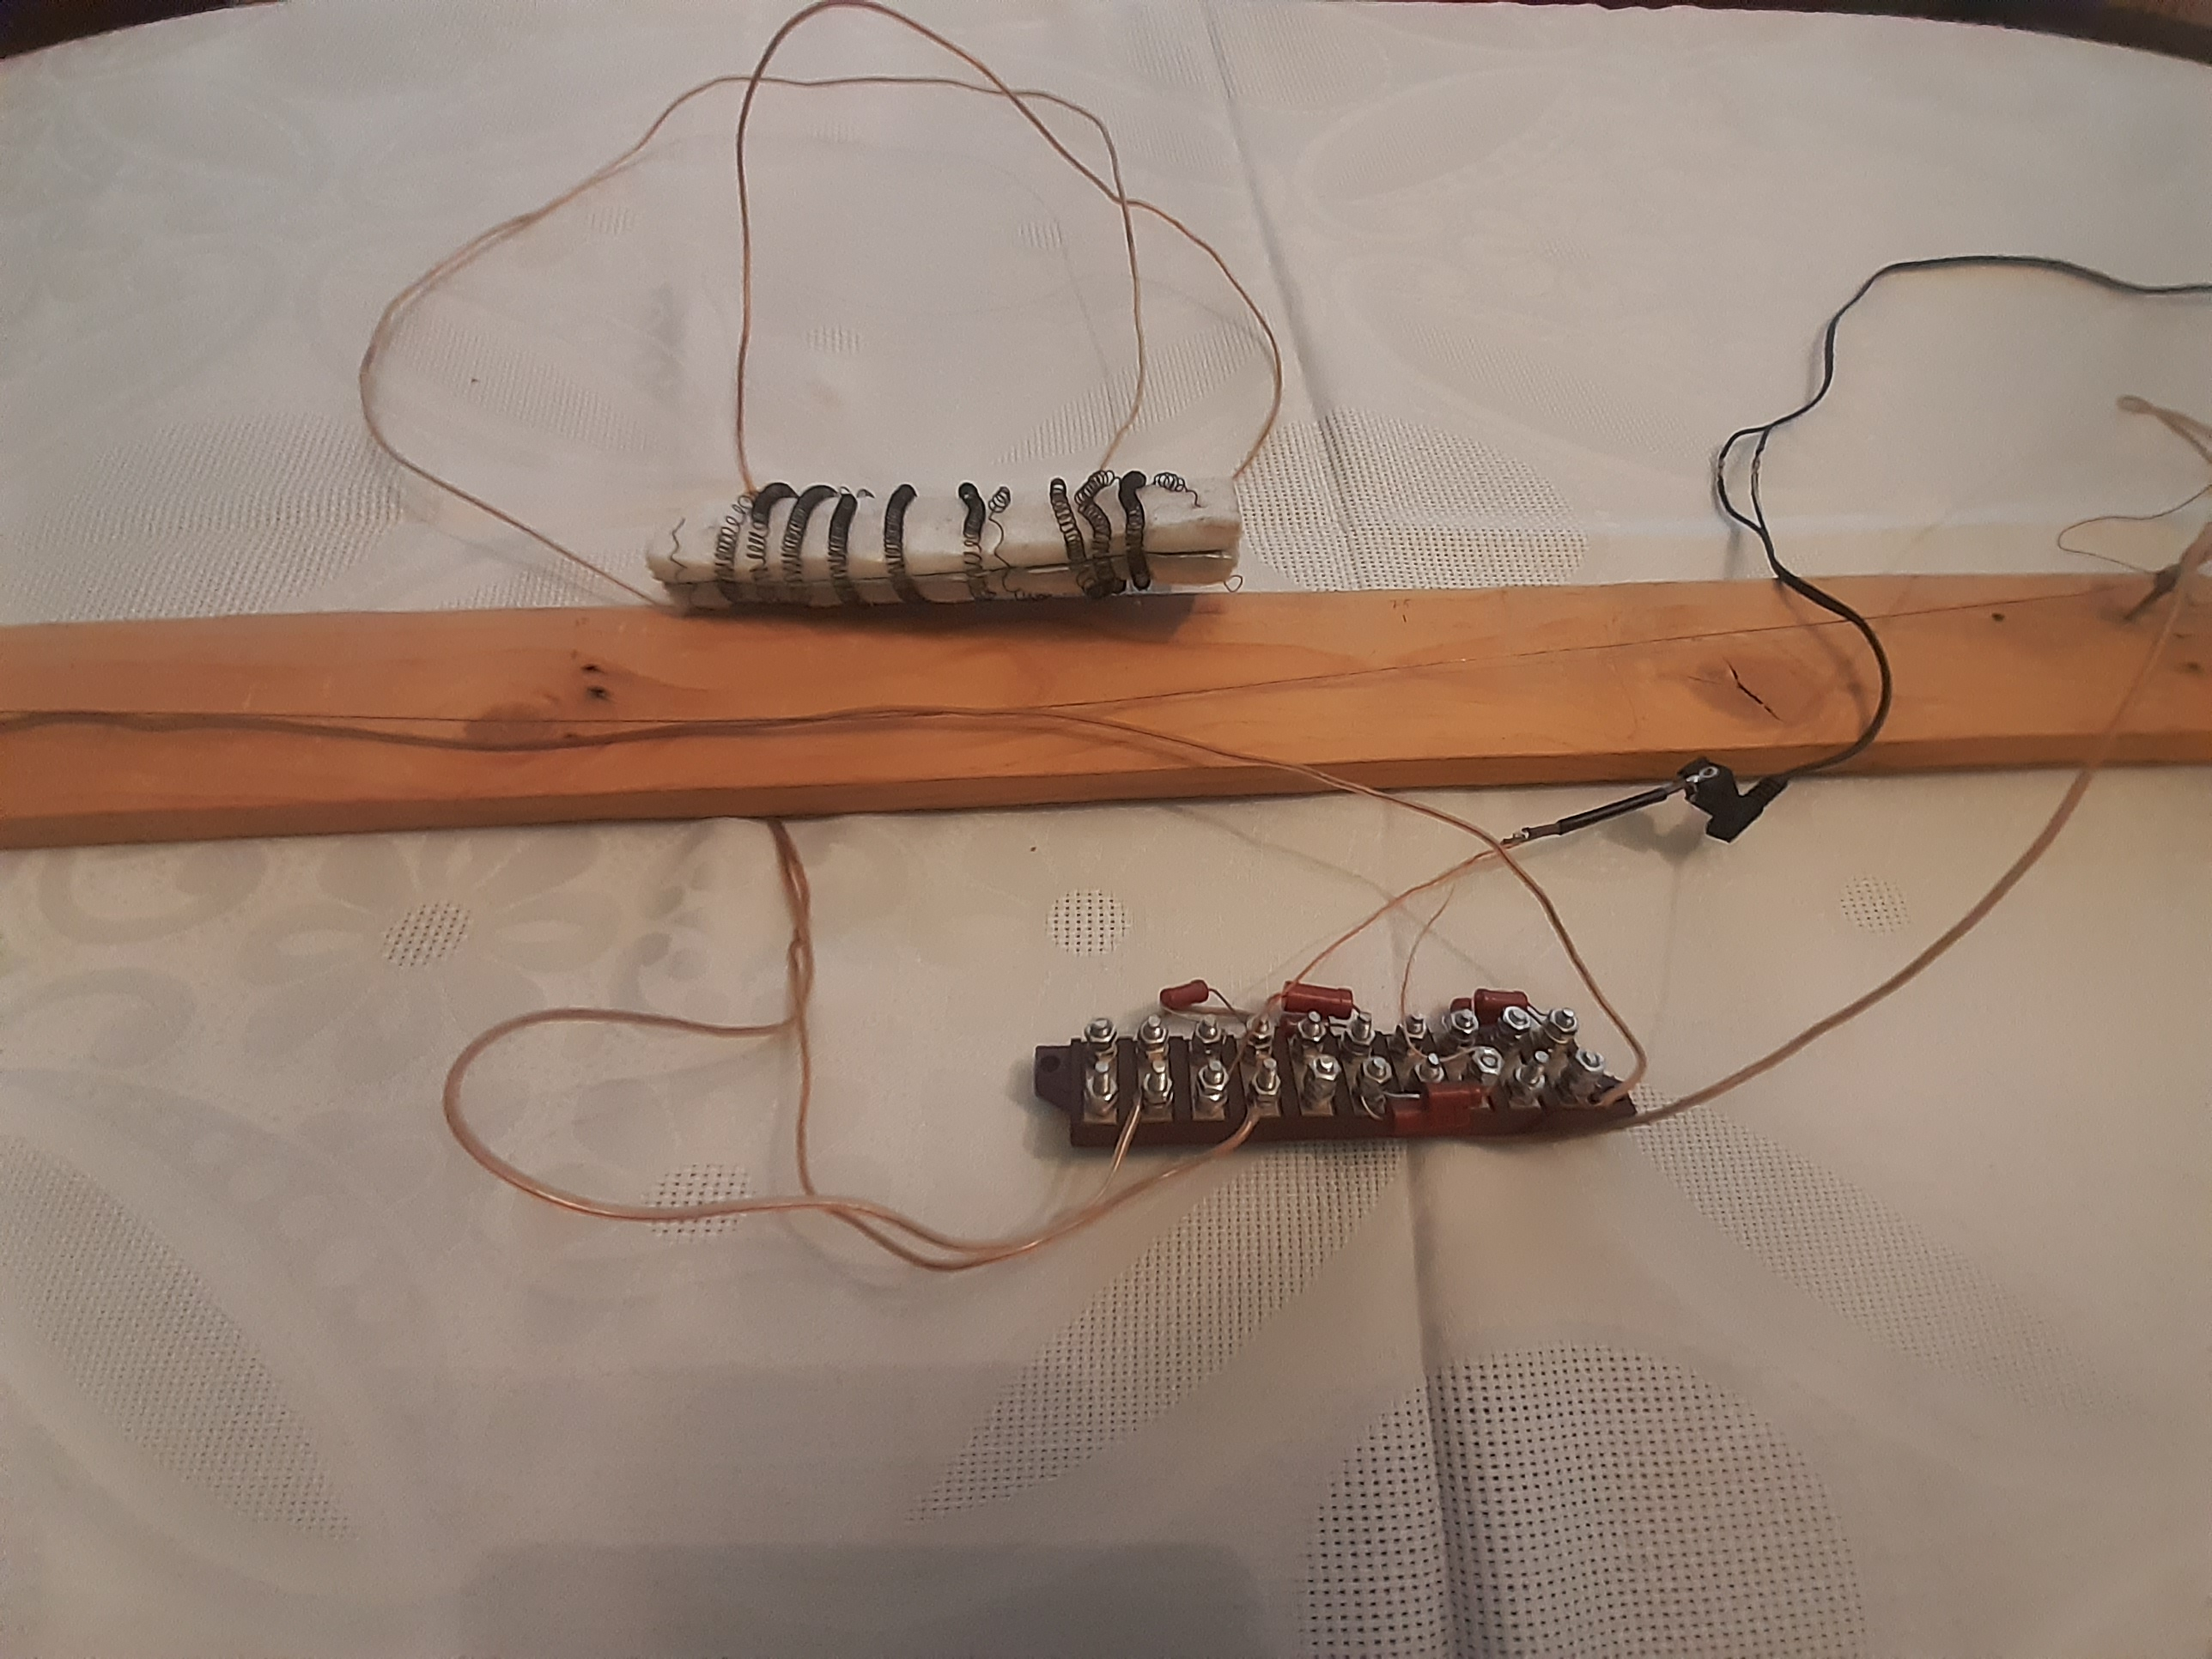

In [1]:
R = 20.8 # Ohm
P = 21.6 # Ohm
Q = 21.4 # Ohm
X = 20.8 # Ohm
L =  0.433 # 0hm

Переміщайте рухомий контакт D вздовж провідника EF, доки гальванометр не покаже нуль. Ця позиція (у відсотках від відстані E до F) дорівнюватиме L1.

Поміняйте місцями R і X (невідомий і відомий опір). Встановіть рухомий контакт D у нову точку, де міст буде збалансовано. Ця позиція дорівнюватиме L2.

Якщо опір дроту на відсоток позначити як $\sigma$, то різниця опорів дорівнюватиме різниці опору провідника моста між L1 і L2:

$$R - X = \sigma \cdot (L2 - L1)$$

In [2]:
sigma = L / 100  # 0hm / sm 
sigma

0.00433000000000000

In [3]:
plot_data = []
M = []

In [4]:
# T = 22.7 ..22.6 # *C
T  = 22.65
L1 = 51.4
L2 = 71.6

In [5]:
X = R + (L1-L2)*sigma
plot_data += [(T, X)]
M += [[T, L1, L2, X]]
X

20.7125340000000

In [6]:
# T = 25.4 ..25.6 # *C
T  = 25.5
L1 = 58
L2 = 63.8

In [7]:
X = R + (L1-L2)*sigma
plot_data += [(T, X)]
M += [[T, L1, L2, X]]
X

20.7748860000000

In [8]:
# T = 28 *C
T  = 28
L1 = 72.9
L2 = 56.1

In [9]:
X = R + (L1-L2)*sigma
plot_data += [(T, X)]
M += [[T, L1, L2, X]]
X

20.8727440000000

In [10]:
# T = 33.6 *C
T  = 33.6
L1 = 85.5
L2 = 41

In [11]:
X = R + (L1-L2)*sigma
plot_data += [(T, X)]
M += [[T, L1, L2, X]]
X

20.9926850000000

In [12]:
# T = 34.6 *C
T = 34.6
L1 = 90.5
L2 = 43.1

In [13]:
X = R + (L1-L2)*sigma
plot_data += [(T, X)]
M += [[T, L1, L2, X]]
X

21.0052420000000

In [14]:
# T = 38 *C
T  = 38
L1 = 96
L2 = 25.3

In [15]:
X = R + (L1-L2)*sigma
plot_data += [(T, X)]
M += [[T, L1, L2, X]]
X

21.1061310000000

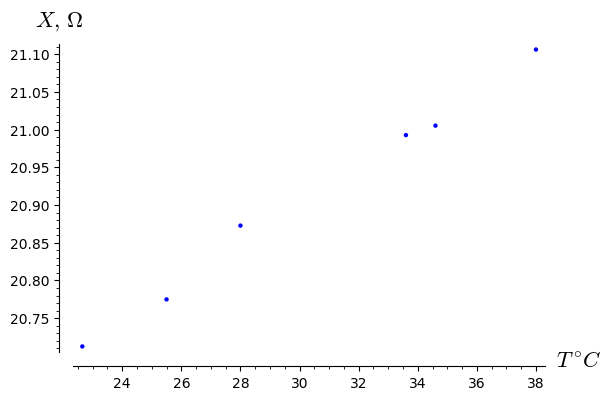

In [16]:
plt = list_plot(plot_data,axes_labels=['$T\\,^{\\circ}C$','$X,\\,\\Omega$'])
plt.show()

In [17]:
import common as cm
cm.displ(cm.latex_arr(M,titles = ["T,\\, ^{\\circ}C", "l_{1},\\, \\%", "l_2,\\, \\%", "X,\\, \\Omega"],
                formats = ['.2f', '.1f', '.1f', '.4f'], indexes = [0,1,2,3]))

<IPython.core.display.Math object>

# Linear approximation

In [18]:
# build error function
a, b = var("a, b")
errors = 0
for (T, X) in plot_data:
    errors += (a*T + b - X)^2
errors = errors.expand()

In [19]:
cm.disp(errors)

<IPython.core.display.Math object>

In [20]:
# Derivatives of error function

In [21]:
cm.disp(diff(errors, a))

<IPython.core.display.Math object>

In [22]:
cm.disp(diff(errors, b))

<IPython.core.display.Math object>

In [23]:
# set derivatives of error function equial to zero

In [24]:
equations = [diff(errors, a) == 0, diff(errors, b) == 0]
equations

[11434.7850000000*a + 364.700000000000*b - 7635.00777460000 == 0,
 364.700000000000*a + 12*b - 250.928444000000 == 0]

In [25]:
# solve obtained equations, and find a, b
solution_ab = solve(equations, [a,b])[0]
solution_ab

[a == (41981727620819/1660243154225000),
 b == (668819158813364311/33204863084500000)]

In [26]:
A = solution_ab[0].rhs().n()
A

0.0252864934356052

In [27]:
B = solution_ab[1].rhs().n()
B

20.1422049870029

# build linear approximation plot

In [28]:
t = var("t")
X_approximation = A * t + B

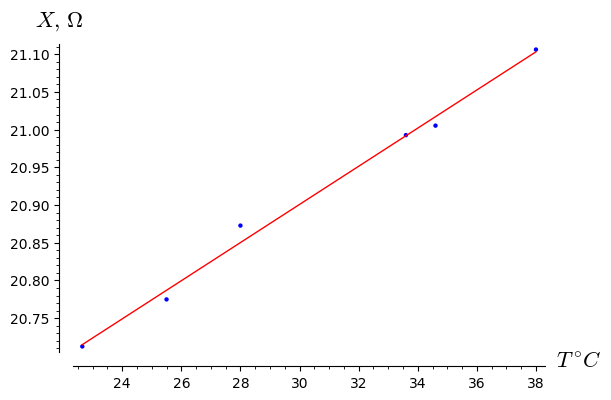

In [29]:
plt += plot(X_approximation, t, 22.65, 38, color = "red")
plt.show()

Температурний коефіцієнт електричного опору - величина, що дорівнює відносної зміни електричного опору ділянки електричного ланцюга або питомого опору речовини при зміні температури на одиницю.

$\alpha = \frac{1}{R}\frac{dR}{dT}$

In [33]:
dR_dT = A

In [34]:
alpha = dR_dT / 20.95
alpha

0.00120699252675920

Якщо $X_1$ і $X_2$ є опором котушки при температурах $t_1$ і $t_2$, температурний
коефіцієнт опорів визначається рівнянням:

$\alpha = \frac{X_2- X_1}{X_1 t_2 - X_2 t_1}$

In [35]:
(21.1061 - 20.7125) / (20.7125 * 38 - 21.1061 * 22.65)

0.00127369640400978